## Simple linear regression on a hotel dataset

This dataset has been provided by Jason Liu on Kaggle, which has been scrapped from Booking.com.

There are a lot of things we can do with this dataset, but I will start by trying to predict the average score of a hotel, based on the reviewer's score (as it had the strongest correlation). 

Spoiler alert.. It didn't work

In [25]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
warnings.simplefilter('ignore')

In [26]:
# Get the data

df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


#### Review the dataset

In [3]:
## Check the shape 
df.shape

(515738, 17)

In [4]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

In [5]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
Hotel_Address                                 515212 non-null object
Additional_Number_of_Scoring                  515212 non-null int64
Review_Date                                   515212 non-null object
Average_Score                                 515212 non-null float64
Hotel_Name                                    515212 non-null object
Reviewer_Nationality                          515212 non-null object
Negative_Review                               515212 non-null object
Review_Total_Negative_Word_Counts             515212 non-null int64
Total_Number_of_Reviews                       515212 non-null int64
Positive_Review                               515212 non-null object
Review_Total_Positive_Word_Counts             515212 non-null int64
Total_Number_of_Reviews_Reviewer_Has_Given    515212 non-null int64
Reviewer_Score                                515212 non-null flo

In [6]:
## Find how many null values
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(511944, 17)

In [8]:
df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

In [9]:
## Find how many unique values
df.nunique()

Hotel_Address                                   1476
Additional_Number_of_Scoring                     479
Review_Date                                      731
Average_Score                                     34
Hotel_Name                                      1475
Reviewer_Nationality                             227
Negative_Review                               327927
Review_Total_Negative_Word_Counts                402
Total_Number_of_Reviews                         1132
Positive_Review                               409941
Review_Total_Positive_Word_Counts                365
Total_Number_of_Reviews_Reviewer_Has_Given       197
Reviewer_Score                                    37
Tags                                           54934
days_since_review                                731
lat                                             1472
lng                                             1472
dtype: int64

In [10]:
## Only look for the columns with numbers
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [11]:
## Check the stats
df_num.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000,511944.000000
mean,500.456802,8.398216,18.543247,2748.469807,17.766849,7.151145,8.396053,49.443040,2.824222
std,501.549523,0.549038,29.696878,2323.330791,21.789369,11.028050,1.637778,3.468029,4.581637
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214277,-0.143649
50%,343.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,-0.000250
75%,666.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


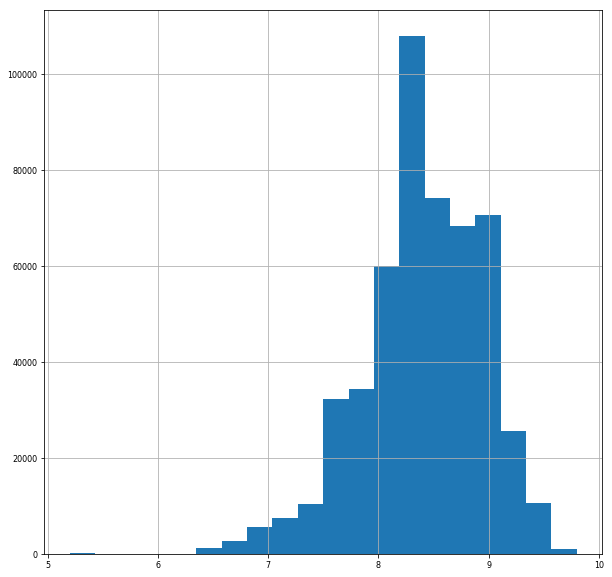

In [12]:
## Histogram for the average score
df_num['Average_Score'].hist(figsize=(10, 10), bins=20, xlabelsize=8, ylabelsize=8)

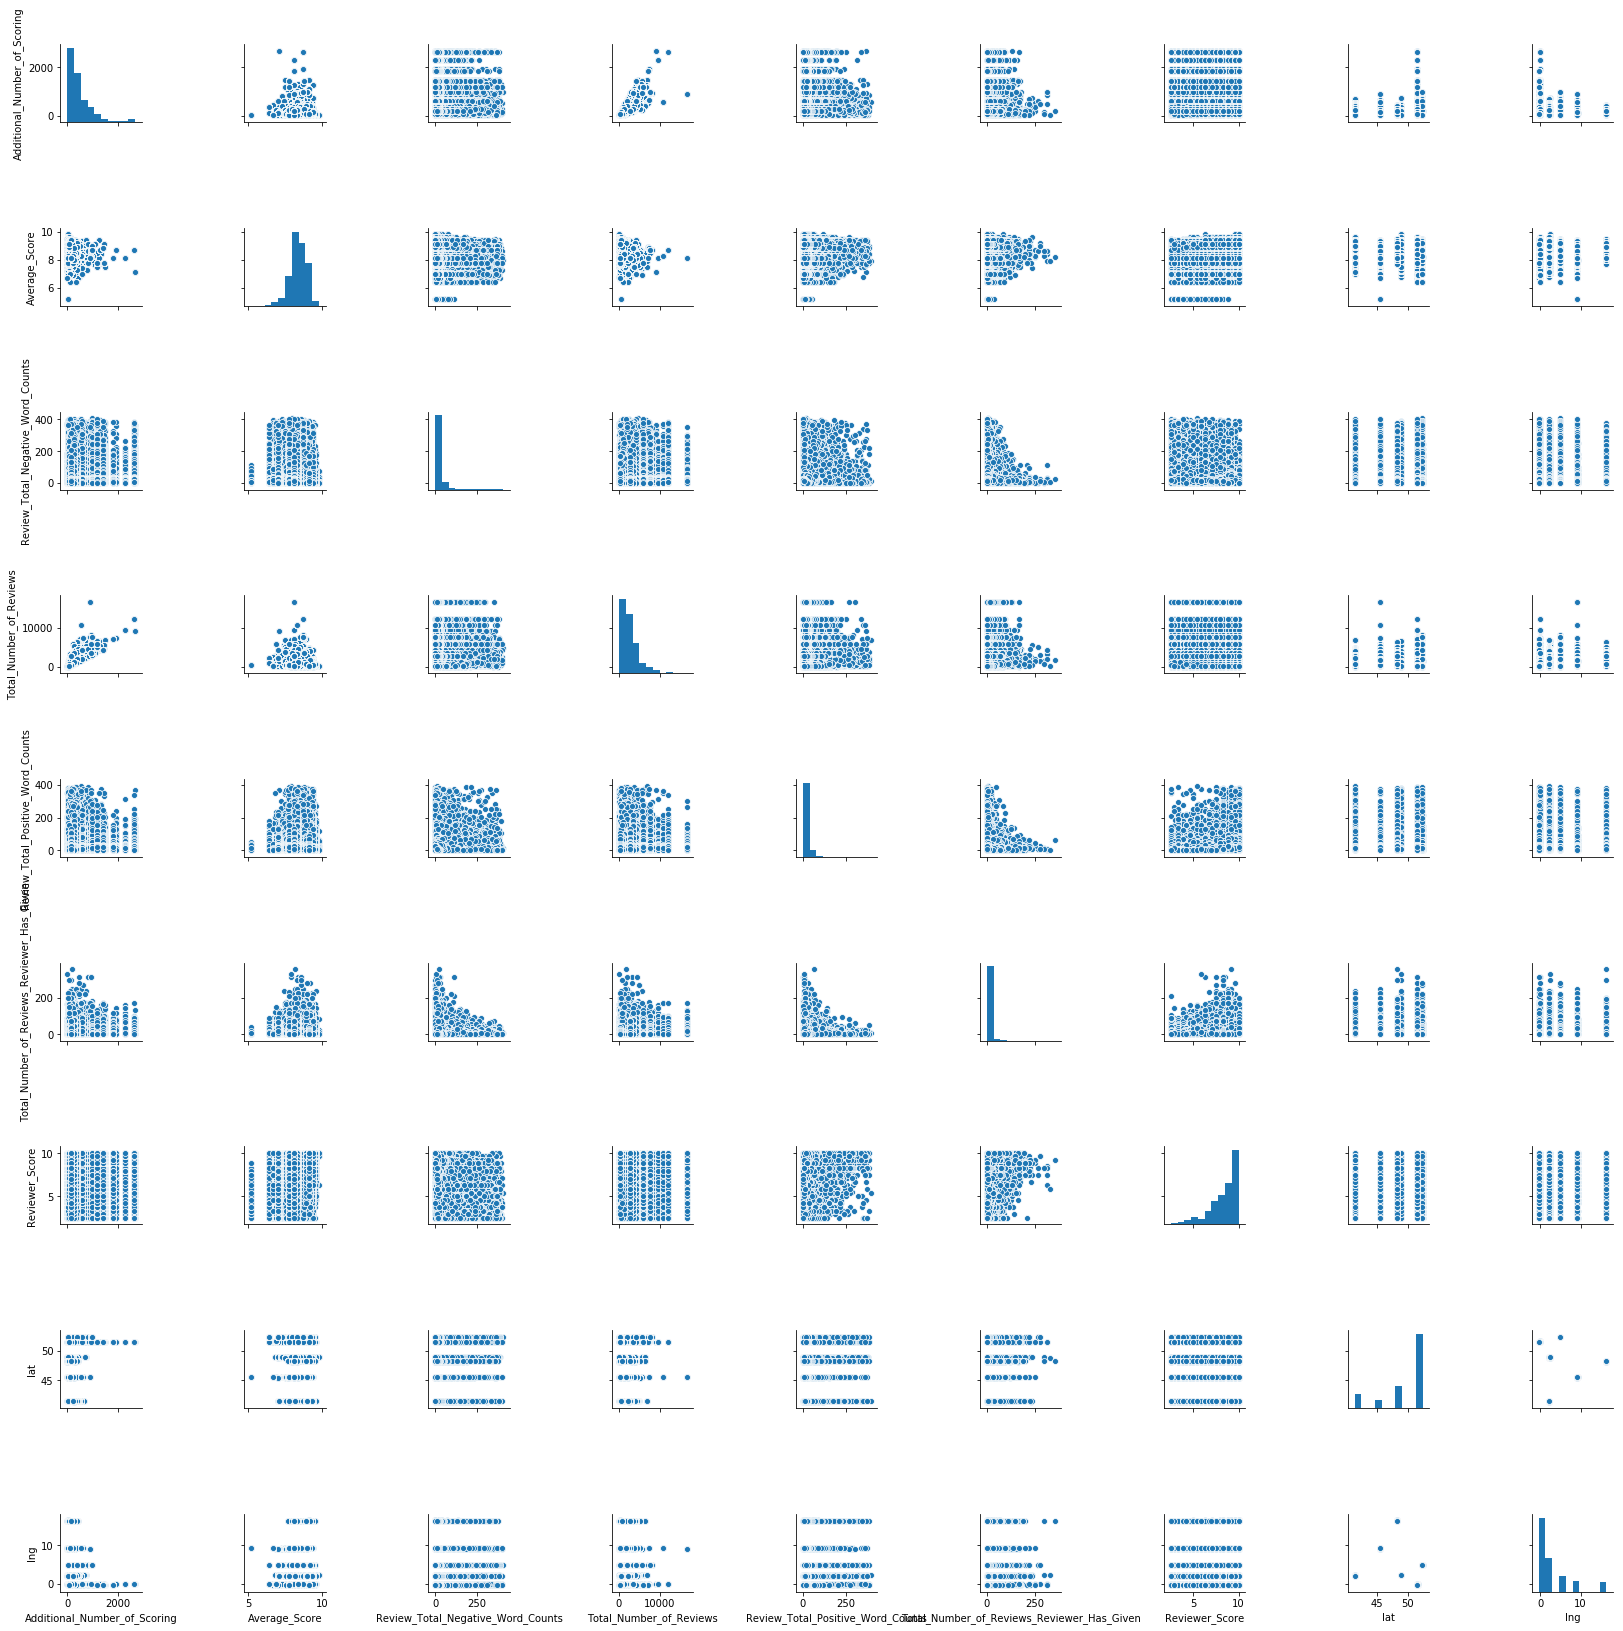

In [13]:
## Scatter plots with all numerical variables at once
sns.pairplot(df_num)
plt.show()

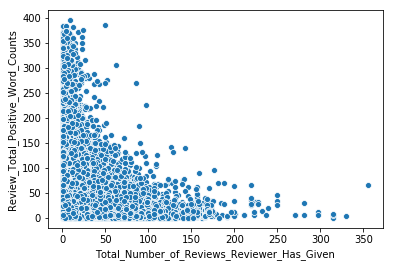

In [14]:
ax = sns.scatterplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Review_Total_Positive_Word_Counts", data=df_num)

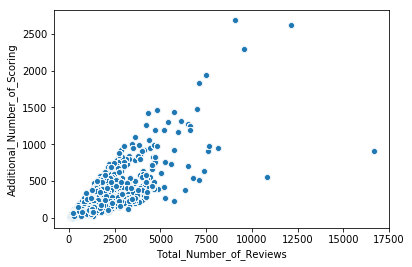

In [15]:
ax1 = sns.scatterplot(x="Total_Number_of_Reviews", y="Additional_Number_of_Scoring", data=df_num)

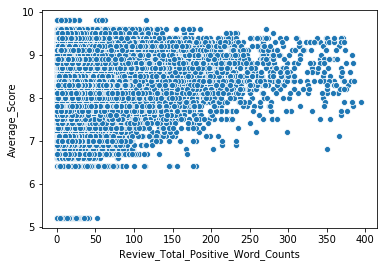

In [16]:
ax2 = sns.scatterplot(x="Review_Total_Positive_Word_Counts", y="Average_Score", data=df_num)

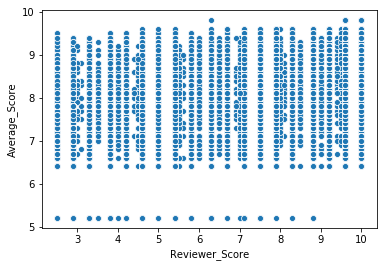

In [17]:
ax3 = sns.scatterplot(x="Reviewer_Score", y="Average_Score", data=df_num)

### Average Score is best correlated with the Reviewer's Score - "if you like me, i'll like you back"..?

In [18]:
## See all the correlations against other features
df_num.corr(method='pearson')

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Additional_Number_of_Scoring,1.000000,-0.154171,0.029208,0.825228,-0.053025,-0.071675,-0.062177,0.336270,-0.295876
Average_Score,-0.154171,1.000000,-0.112663,-0.180215,0.106912,0.036932,0.364791,-0.108804,0.106100
Review_Total_Negative_Word_Counts,0.029208,-0.112663,1.000000,0.035129,0.119196,0.003030,-0.382653,0.019116,-0.020012
Total_Number_of_Reviews,0.825228,-0.180215,0.035129,1.000000,-0.029981,-0.024992,-0.073137,0.100262,-0.014200
Review_Total_Positive_Word_Counts,-0.053025,0.106912,0.119196,-0.029981,1.000000,0.026489,0.220643,-0.037590,0.035475
Total_Number_of_Reviews_Reviewer_Has_Given,-0.071675,0.036932,0.003030,-0.024992,0.026489,1.000000,0.002997,-0.059805,0.110855
Reviewer_Score,-0.062177,0.364791,-0.382653,-0.073137,0.220643,0.002997,1.000000,-0.036644,0.033989
lat,0.336270,-0.108804,0.019116,0.100262,-0.037590,-0.059805,-0.036644,1.000000,-0.304546
lng,-0.295876,0.106100,-0.020012,-0.014200,0.035475,0.110855,0.033989,-0.304546,1.000000


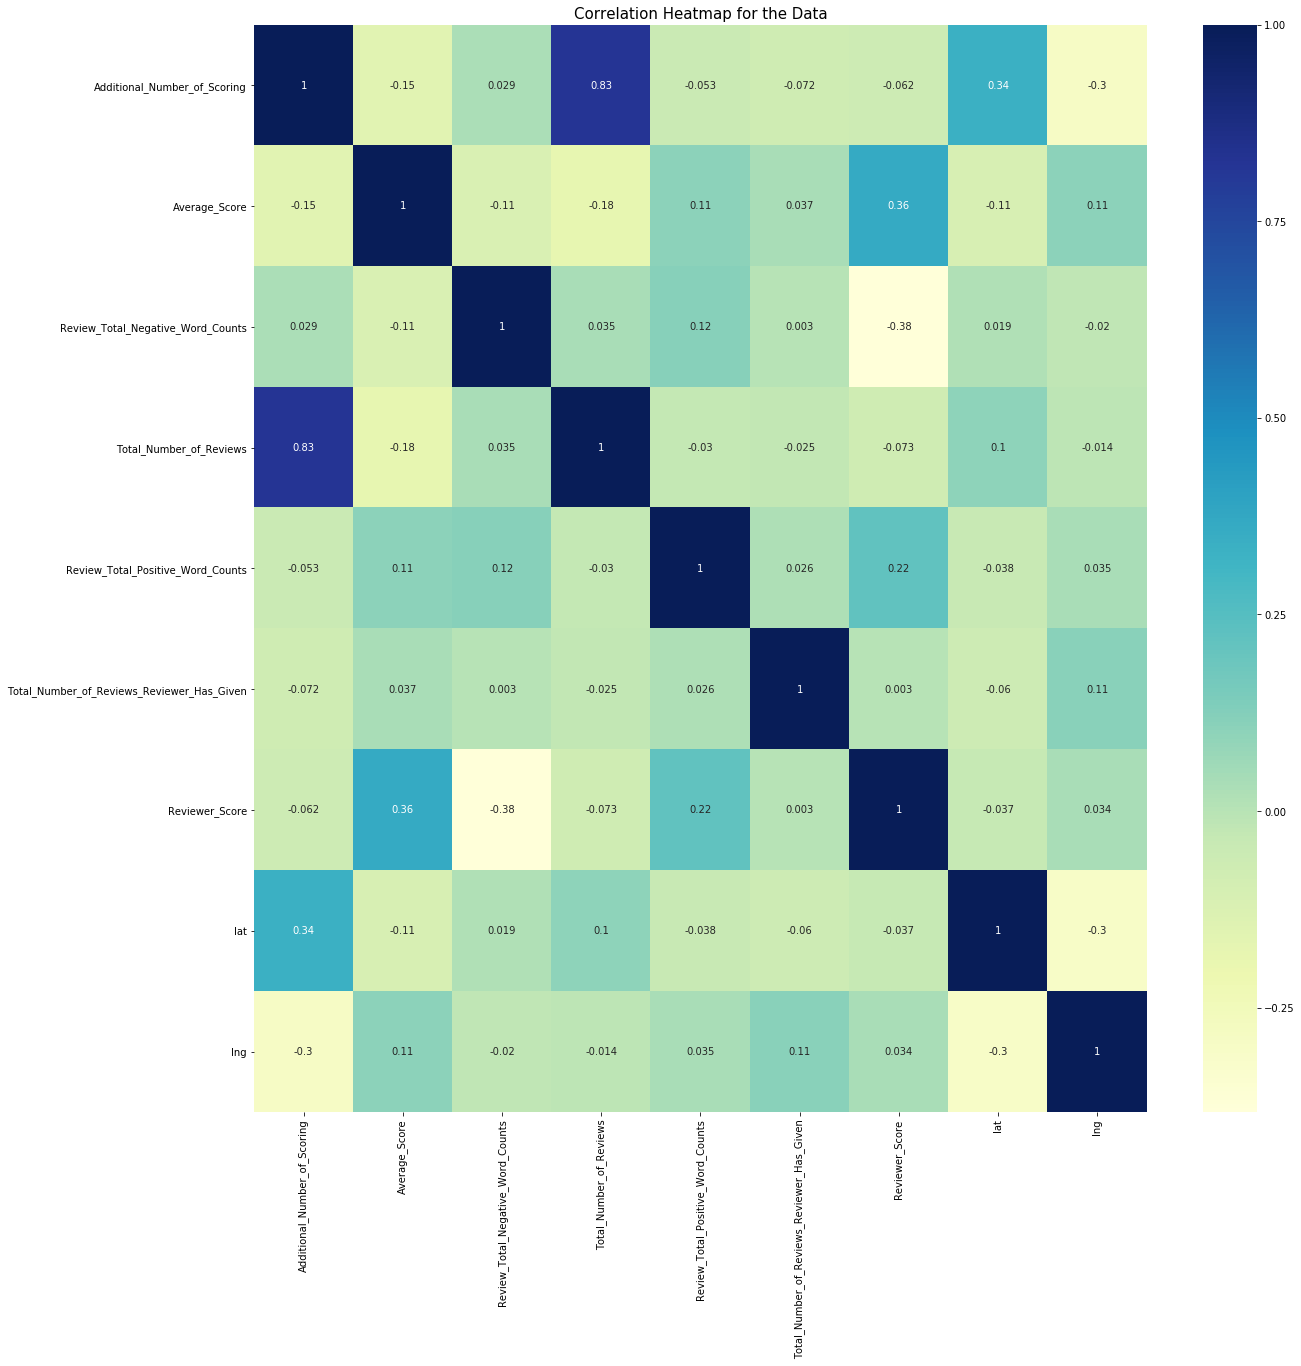

In [19]:
## Heat Map of correlations

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

#### Machine Learning Attempt with one feature

In [20]:
from sklearn.model_selection import train_test_split
from numpy import array

df_lin = df[['Average_Score', 'Reviewer_Score']]

X = np.array(df_lin.Reviewer_Score)

y = np.array(df_lin.Average_Score)


train, test = train_test_split(df_lin, test_size=0.2)

In [21]:
# Use only one feature

y_train = train['Average_Score']
X_train = np.array(train.Reviewer_Score).reshape(-1, 1)
y_test = test['Average_Score']
X_test = np.array(test.Reviewer_Score).reshape(-1, 1)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
model = regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_predicted))
print("Accuracy Score: ", round(model.score(X_train, y_train) * 100, 2),"%")


Mean Squared Error:  0.2625657747615223
Accuracy Score:  13.38 %


### Despite the low accuracy score, this was an interesting way to explore the dataset. I'll leave this dataset for now, have a think about it and come back to it later.